In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
pip install sns --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2645 sha256=0e0a59af7edf429696dab6ba5f7ceaa370ef63c3b208ddd6364db1b712979021
  Stored in directory: c:\users\home\appdata\local\pip\cache\wheels\26\ac\4b\7743e50a108f4a12a07e0e257dbecefc884a953125a6e1b48f
Successfully built sns
Note: you may need to restart the kernel to use updated packages.


In [5]:
warnings.filterwarnings("ignore")

### Датасет

In [7]:
df_base = pd.read_csv(r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Pokemon.csv")
df_base = df_base.drop('SN', axis = 1)
df_base.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


### 1. Построим столбчатую диаграмму


In [9]:
df_base.columns

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Attack',
       'Sp. Defense', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [11]:
stats = ['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed']

In [13]:
df_long = df_base.copy()

In [209]:
df_long = (
    df_base
    .reset_index()
    .melt(
        id_vars = ['Name', 'Type 1', 'Type 2'],
        value_vars = ['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed'],
        var_name = 'Stats', 
        value_name = 'Amount'
    )
)
df_long.head()

,Name,Type 1,Type 2,Stats,Amount
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39


In [221]:
df_stat = (
    df_long
    .pivot_table(values = 'Amount', 
                 index = ['Type 2'], 
                 columns = 'Stats', 
                 aggfunc = 'mean',
                 margins = True, 
                 margins_name = 'Stat_mean')
    #.sort_values('Stat_mean', ascending = False)
    .drop('Stat_mean', axis = 1)    
    #.head (50)
)
df_stat

Stats,Attack,Defense,HP,Sp. Attack,Sp. Defense,Speed
Type 2,,,,,,
Bug,90.000000,80.000000,53.333333,46.666667,61.666667,61.666667
Dark,109.800000,72.050000,75.550000,81.800000,69.850000,75.350000
Dragon,94.444444,87.055556,82.166667,98.500000,83.444444,80.555556
Electric,72.666667,68.333333,88.166667,81.166667,73.500000,71.500000
Fairy,61.608696,73.869565,64.304348,75.000000,81.956522,61.217391
Fighting,112.846154,82.500000,79.461538,81.269231,82.384615,87.384615
Fire,81.250000,80.166667,71.250000,110.416667,83.500000,79.666667
Flying,80.288660,68.309278,71.391753,75.628866,71.206186,85.721649
Ghost,84.142857,82.285714,59.142857,73.214286,78.071429,53.857143


In [19]:
stat_mean_type2 = df_stat.loc['Stat_mean'].values
stat_mean_type2

array([83.17391304, 79.6763285 , 70.64975845, 77.04830918, 75.56521739,
       70.51449275])

In [223]:
x_name = df_stat.loc['Stat_mean'].index
x_name

Index(['Attack', 'Defense', 'HP', 'Sp. Attack', 'Sp. Defense', 'Speed'], dtype='object', name='Stats')

In [23]:
len(x_name)

6

In [316]:
stat_num = pd.DataFrame(stat_mean_type2).round(1).set_index(x_name)
stat_num 

,0
Stats,
Attack,83.2
Defense,79.7
HP,70.6
Sp. Attack,77.0
Sp. Defense,75.6
Speed,70.5


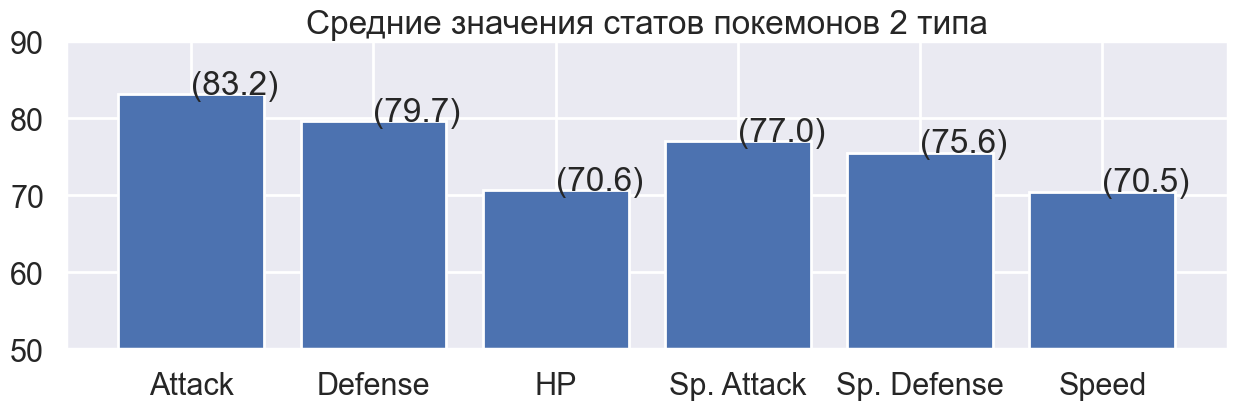

In [318]:
plt.figure(figsize = (15,4))
plt.bar(x_name, height = stat_mean_type2)
plt.ylim(50,90)
plt.title('Средние значения статов покемонов 2 типа')
for i in range(len(x_name)):
    plt.annotate(text = f'({stat_num.iloc[i,0]})', xy = (x_name[i], stat_mean_type2[i]))

plt.show()
#Вывод: из диаграммы можно увидеть, что в среднем показатели специальной атаки и защиты ниже обычных (для покемонов 2 типа)

### 2. Построим гистограмму с распределением числовой переменной


In [114]:
sns.set(palette = 'deep', context = 'poster')

In [73]:
df_stat_name = (
    df_long
    .pivot_table(values = 'Amount', 
                 index = ['Name'], 
                 columns = 'Stats', 
                 aggfunc = 'mean')#,
                 #margins = True, 
                 #margins_name = 'Stat_mean')
    #.sort_values('Stat_mean', ascending = False)
    #.drop('Stat_mean', axis = 1)    
    #.head (50)
)
df_attack = df_stat_name['Attack'].values
df_sp_attack = df_stat_name['Sp. Attack'].values

In [185]:
df_stat_name

Stats,Attack,Defense,HP,Sp. Attack,Sp. Defense,Speed
Name,,,,,,
Abomasnow,92.0,75.0,90.0,92.0,85.0,60.0
AbomasnowMega Abomasnow,132.0,105.0,90.0,132.0,105.0,30.0
Abra,20.0,15.0,25.0,105.0,55.0,90.0
Absol,130.0,60.0,65.0,75.0,60.0,75.0
AbsolMega Absol,150.0,60.0,65.0,115.0,60.0,115.0
...,...,...,...,...,...,...
Zoroark,105.0,60.0,60.0,120.0,60.0,105.0
Zorua,65.0,40.0,40.0,80.0,40.0,65.0
Zubat,45.0,35.0,40.0,30.0,40.0,55.0


In [77]:
df_attack

array([ 92., 132.,  20., 130., 150.,  70., 150.,  50., 105., 135., 110.,
       140.,  70.,  50.,  50.,  75.,  70., 110.,  59., 100.,  85.,  75.,
        95.,  95.,  85., 110., 120., 112., 140.,  90., 125.,  72.,  70.,
        85.,  60.,  60.,  77., 117.,  87., 125.,  50.,  20.,  75.,  40.,
       115., 165., 105.,  48.,  92.,  52.,  62., 110.,  70.,  90., 150.,
        75.,  55.,  80.,  75.,  69.,  85.,  45.,  52., 125.,  83., 103.,
       120., 160.,  10.,  60., 105.,  80., 110.,  59., 123., 130.,  89.,
        24.,  30.,  65.,  49.,  66.,  36.,  29.,  45.,  85., 115., 100.,
       120.,  50., 100., 108.,  90.,  35.,  70.,  30., 100.,  55.,   5.,
        84., 130., 104.,  52.,  64.,  65.,  60.,  35., 107.,  61.,  49.,
        58.,  50.,  38.,  30.,  95.,  64.,  53.,  73.,  70.,  70.,  45.,
        25.,  95.,  90.,  50.,  30.,  85., 140.,  80.,  55.,  27.,  81.,
       125., 120.,  70.,  61.,  90.,  80.,  95.,  50.,  70.,  50.,  52.,
        90., 140.,  30.,  90.,  58.,  60.,  65.,  6

In [79]:
df_sp_attack

array([ 92., 132., 105.,  75., 115., 100., 150.,  50.,  60.,  70.,  60.,
        60.,  40., 135., 175.,  40.,  70., 110.,  67.,  60.,  85., 115.,
       165.,  40.,  65., 100., 120.,  74., 112.,  60.,  70.,  99.,  40.,
        95.,  60.,  80.,  99.,  44.,  30., 125.,  60.,  20.,  40.,  40.,
        83.,  93.,  54.,  46.,  80.,  47.,  63.,  70., 100.,  45.,  15.,
       125.,  35.,  90.,  70.,  32.,  55.,  35.,  39.,  60.,  85., 135.,
       110., 130.,  75.,  50.,  50.,  10.,  40.,  90.,  57.,  60.,  79.,
        24.,  50.,  60.,  65.,  44.,  32.,  29.,  90.,  85., 115., 105.,
       145.,  50.,  90.,  83.,  65.,  25.,  70.,  20., 100., 145.,  35.,
       109., 130., 159.,  60.,  80.,  92.,  87.,  62.,  74.,  48.,  49.,
        58.,  95.,  56.,  65.,  65.,  74.,  58., 120.,  70.,  95.,  60.,
        45.,  85.,  90.,  95.,  30.,  85.,  55.,  50.,  65.,  37.,  81.,
        30.,  90.,  75.,  61.,  70.,  59.,  65.,  95.,  60.,  40.,  60.,
       135.,  30., 140.,  15.,  81.,  40.,  45.,  5

In [93]:
df_attack.size

800

In [122]:
data_attack = pd.DataFrame({
    'var' : np.hstack([df_attack, df_sp_attack]),
    'group' : ['Attack']*df_attack.size + ['Sp. Attack']*df_sp_attack.size
    })
data_attack

,var,group
0,92.0,Attack
1,132.0,Attack
2,20.0,Attack
3,130.0,Attack
4,150.0,Attack
...,...,...
1595,120.0,Sp. Attack
1596,80.0,Sp. Attack
1597,30.0,Sp. Attack
1598,65.0,Sp. Attack


In [115]:
sns.set(palette = 'deep', context = 'poster')

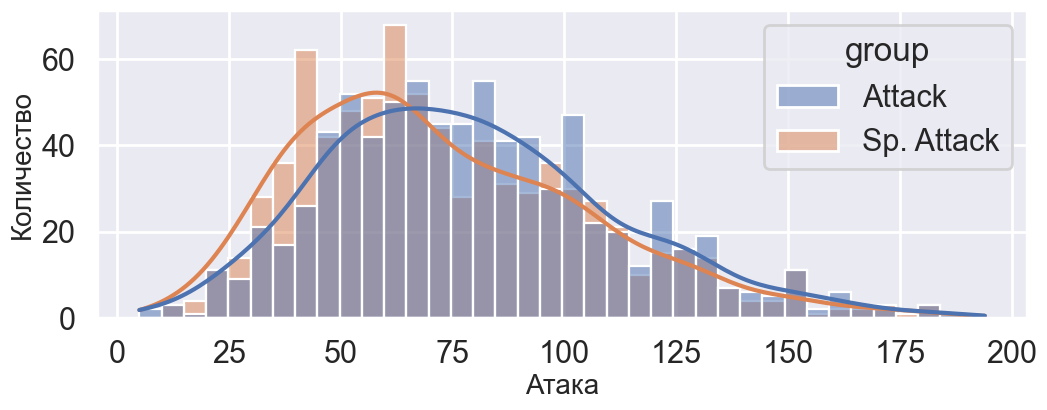

In [300]:
plt.figure(figsize = (12,4))
sns.histplot(x = 'var', data = data_attack, hue = 'group', kde = True, binwidth = 5)
plt.xlabel("Атака", fontsize = 20) # x-axis label
plt.ylabel("Количество", fontsize = 20)
plt.show()

#Вывод: 1. распределения показателей обычной атаки и специальной атаки похожи на нормальные со смещение влево.
#2. специальная атака чаще имеет значения больше чем обычная в пределах до 65, а при значениях выше 65 обычная атака чаще имеет значения выше.

### 3. Построим точечную диаграмму для двух числовых переменных


In [233]:
df_stat_name.head()

Stats,Attack,Defense,HP,Sp. Attack,Sp. Defense,Speed
Name,,,,,,
Abomasnow,92.0,75.0,90.0,92.0,85.0,60.0
AbomasnowMega Abomasnow,132.0,105.0,90.0,132.0,105.0,30.0
Abra,20.0,15.0,25.0,105.0,55.0,90.0
Absol,130.0,60.0,65.0,75.0,60.0,75.0
AbsolMega Absol,150.0,60.0,65.0,115.0,60.0,115.0


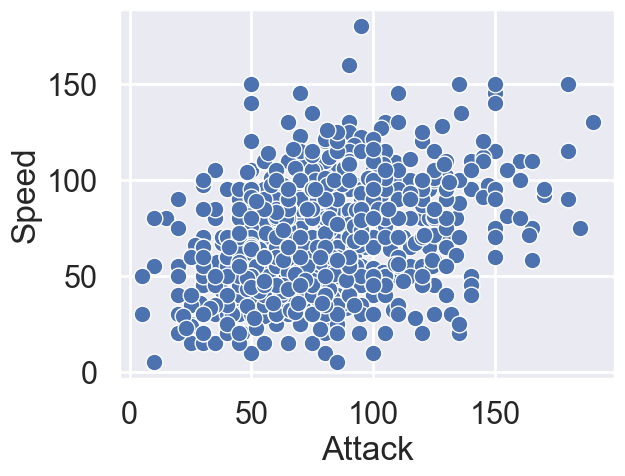

In [275]:
sns.scatterplot(data = df_stat_name, x = 'Attack', y = 'Speed')
plt.show()

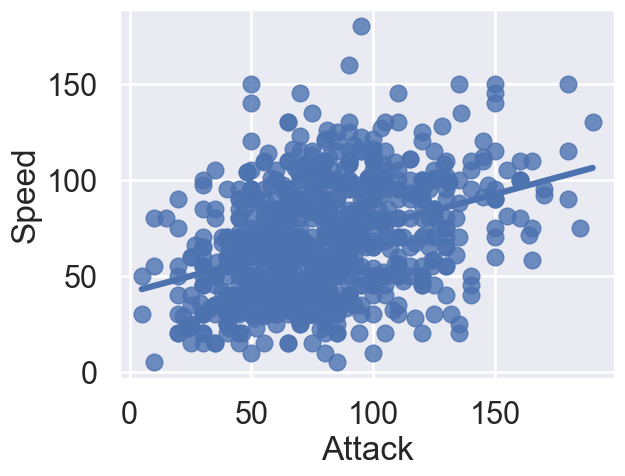

In [294]:
sns.regplot(x = df_stat_name.Attack, y = df_stat_name.Speed, ci = None)
plt.show()
#Вывод: есть небольшая корреляция по параметрам скорость и атака - чем больше один параметр, тем больше и второй

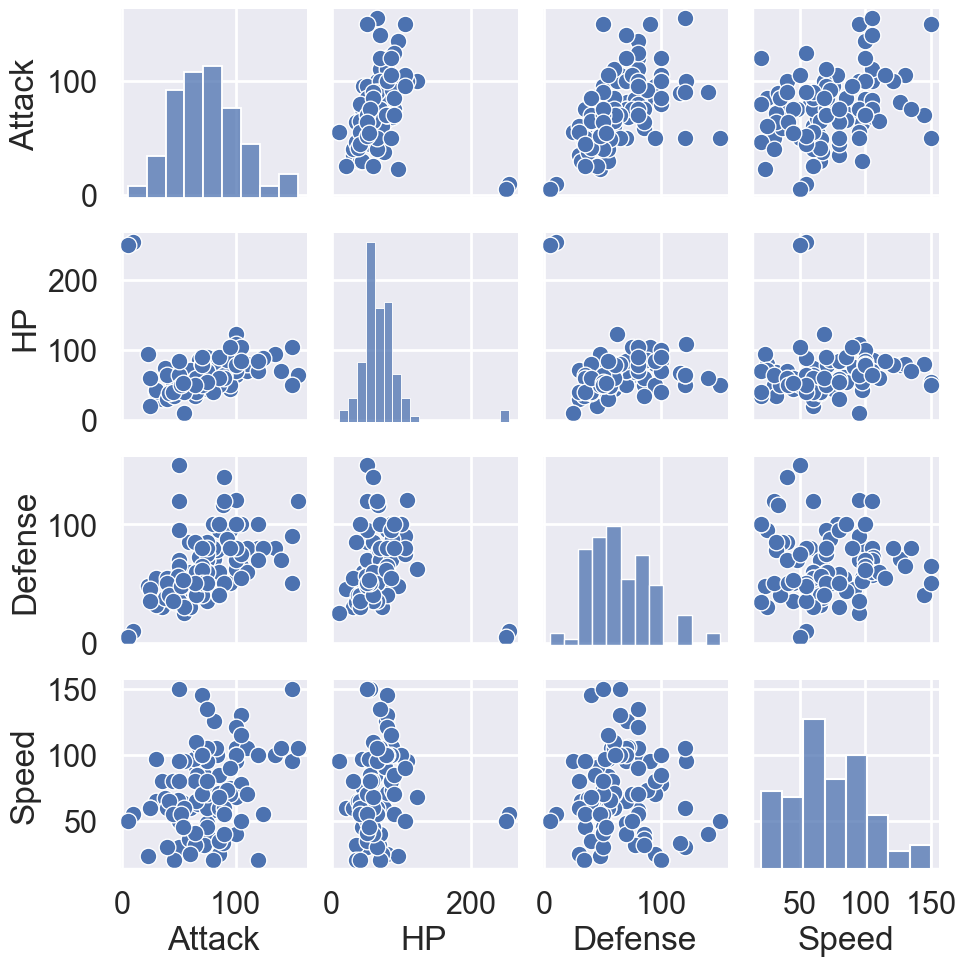

In [378]:
sns.pairplot(df_stat_name[["Attack", "HP", "Defense", "Speed"]].sample(100))
plt.show()

### 4. Построим тепловую карту для двух категориальных переменных


In [400]:
df_long['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [398]:
df_long

,Name,Type 1,Type 2,Stats,Amount
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39
...,...,...,...,...,...
4795,Diancie,Rock,Fairy,Speed,50
4796,DiancieMega Diancie,Rock,Fairy,Speed,110
4797,HoopaHoopa Confined,Psychic,Ghost,Speed,70
4798,HoopaHoopa Unbound,Psychic,Dark,Speed,80


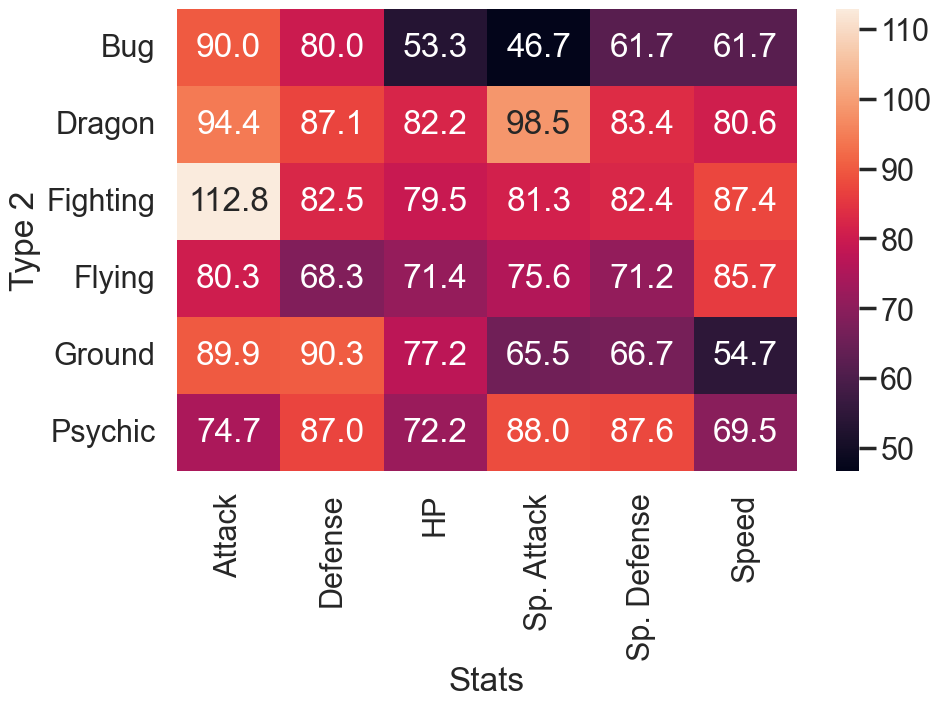

In [438]:
df_type = df_long[df_long['Type 2'].isin(["Flying", "Dragon", "Ground", "Psychic", "Fighting", "Bug"])]
df_type_stat = df_type.groupby(['Type 2', 'Stats'])['Amount'].mean().unstack()
plt.figure(figsize = (10,6))
sns.heatmap(df_type_stat, annot = True, fmt = '.1f')
plt.show()

# Вывод: 1. из представленных типов покемонов по статам самые слабые - Bug, Flying, самые сильные - Fighting, Dragon.
#2. по статам параметр атака принимает наибольшие значения, а здоровье и скорость - наименьшие.